<a href="https://colab.research.google.com/github/SandeepGandham4/PneuDetect/blob/main/PneuDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import AUC
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

Set random seed

In [ ]:
# Set a seed value for reproducibility
seed_value = 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

# 5. For layers that introduce randomness like dropout, ensure they have a seed value if needed
# model.add(Dropout(0.25, seed=seed_value)) - Seed setting directly in Dropout is not necessary in TF 2.x


Generate batches of image data (train, validation, and test) with data augmentation

In [ ]:
## Set file paths to image files
project_path = "/content/drive/MyDrive/chest_xray"
train_path = project_path + "/chest_xray/train/"
val_path = project_path + "/chest_xray/val/"
test_path = project_path + "/chest_xray/test/"

## Set up hyperparameters that will be used later
hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 100
hyper_channels = 1
hyper_mode = 'grayscale'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size,
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary',
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path,
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path,
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()

Found 5220 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
x_val_batch, y_val_batch = next(val_generator)
print(type(x_val_batch), type(y_val_batch))  # Should be np.ndarray

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
!pip install --upgrade tensorflow keras

Train the model

In [ ]:
cnn = Sequential()
cnn.add(InputLayer(shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs = 100,
                              validation_data = val_generator,
                              validation_steps = len(val_generator) if len(val_generator) > 0 else 1,
                              verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
41/41 - 1860s - 45s/step - auc: 0.5224 - loss: 0.5790 - val_auc: 0.5625 - val_loss: 0.8482
Epoch 2/100
41/41 - 0s - 2ms/step - auc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 - 118s - 3s/step - auc: 0.8469 - loss: 0.4282 - val_auc: 0.8594 - val_loss: 0.5826
Epoch 4/100
41/41 - 0s - 8ms/step - auc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
41/41 - 88s - 2s/step - auc: 0.9318 - loss: 0.2877 - val_auc: 0.8672 - val_loss: 0.5255
Epoch 6/100
41/41 - 0s - 8ms/step - auc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
41/41 - 142s - 3s/step - auc: 0.9535 - loss: 0.2413 - val_auc: 0.8984 - val_loss: 0.4879
Epoch 8/100
41/41 - 0s - 8ms/step - auc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
41/41 - 88s - 2s/step - auc: 0.9657 - loss: 0.2076 - val_auc: 0.8516 - val_loss: 0.8093
Epoch 10/100
41/41 - 0s - 9ms/step - auc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
41/41 - 88s - 2s/step - auc: 0.9650 - loss: 0.2065 - val_auc: 0.8203 - val_loss: 0.5805
Epoch 12/100
41/41 - 0s - 708us/step - auc: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/100
41/41 - 92s - 2s/step - auc: 0.9620 - loss: 0.2155 - val_auc: 0.7969 - val_loss: 0.5807
Epoch 14/100
41/41 - 0s - 2ms/step - auc: 0.0000e

Create a function that outputs metrics and charts
Metrics: Accuracy, Precision, Recall, Specificity, and F1 Score
Charts:
1) Train VS. Validation Loss
2) Train VS. Validation AUC
3) Confusion Matrix

In [ ]:
def create_charts(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']

    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]

    ## Define 3: y_pred & y_true
    y_true = test_generator.classes
    Y_pred = cnn.predict(test_generator, steps = len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    y_pred_prob = Y_pred.T[0]

    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))

    ## PLOT 1: TRAIN VS. VALIDATION LOSS
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Pneumonia']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14)
    #plt.savefig('cm.png', transparent=True)

    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)

    ## END PLOTS
    plt.tight_layout()
    ;

    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

Output results via metrics and charts

5/5 ━━━━━━━━━━━━━━━━━━━━ 181s 45s/step
[Summary Statistics]
Accuracy = 91.99% | Precision = 90.09% | Recall = 97.95% | Specificity = 82.05% | F1 Score = 93.86%


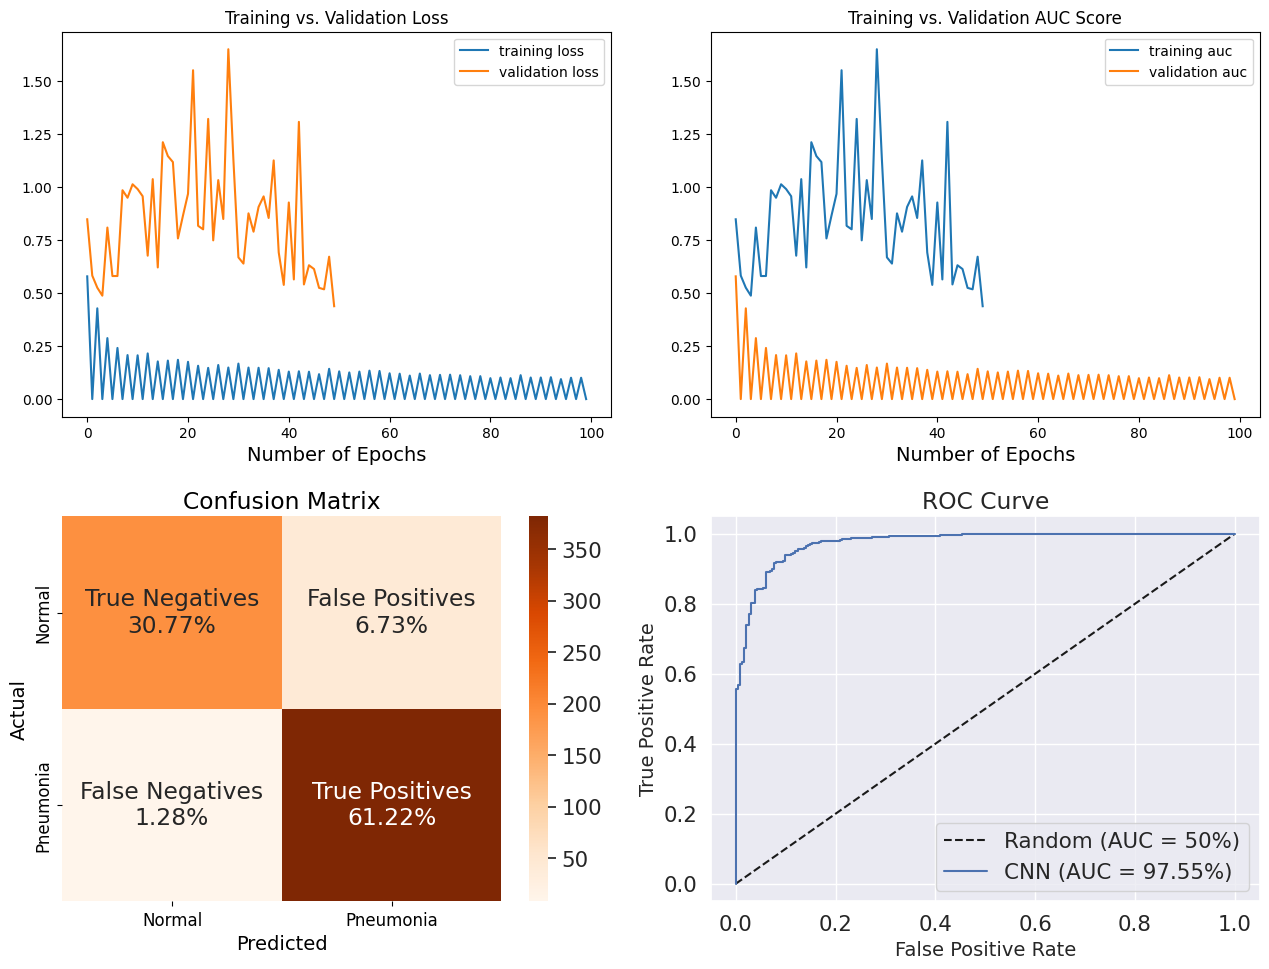

In [ ]:
create_charts(cnn, cnn_model)